## Bias Estimation Plots

### Initialization 

In [191]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [192]:
import os.path
import astropy.table
import astropy.io.fits as fits

### Read Simulation Outputs 

In [193]:
output_catalog_path = '..'
def locate(name): return os.path.join(output_catalog_path,'%s.fits' % name)

In [194]:
lsst_i = fits.open(locate('lsst_i'))

In [195]:
#some interesting subsets of the simulation
cat = astropy.table.Table.read(lsst_i,hdu=1)
iso_gal = cat[cat['grp_size'] == 1] #isolated galaxies
grp_gal = cat[cat['grp_size'] != 1] #galaxies in a group of 2 or more. 

#'good' galaxies satisfy the reasonable criteron below 
good = cat[(cat['snr_iso'] > 10) & (cat['sigma_m'] > .2)]
iso_galg  = iso_gal[(iso_gal['snr_iso'] > 10) & (iso_gal['sigma_m'] > .2)] #'good' isolated galaxies
grp_galg  = grp_gal[(grp_gal['snr_grp'] > 10 )& (grp_gal['sigma_m'] > .2)] #'good' non isolated galaxies.

#gold sample galaxies 
gold = cat[(cat['ab_mag'] < 25.3)] 
iso_gold = iso_gal[(iso_gal['ab_mag'] < 25.3)] #isolated galaxies in the gold sample 
grp_gold = grp_gal[(grp_gal['ab_mag'] < 25.3)] #non isolated galaxies in the gold sample

In [196]:
#number of galaxies in each category
print 'total number of galaxies is {0}'.format(len(cat))
print 'total number of isolated galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(iso_gal), float(len(iso_gal))/len(cat)*100)
print 'total number of non-isolated galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(grp_gal), float(len(grp_gal))/len(cat)*100)
print 'total number of good galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(good), float(len(good))/len(cat)*100)
print 'total number of good isolated galaxies is {0}, they constitute {1:.2f}% of the isolated galaxies, and {2:.2f}% of the total.'.format(len(iso_galg),float(len(iso_galg))/len(iso_gal)*100, float(len(iso_galg))/len(cat)*100)
print 'total number of good non-isolated galaxies is {0}, they constitute {1:.2f}% of the non-isolated galaxies, and {2:.2f}% of the total.'.format(len(grp_galg), float(len(grp_galg))/len(grp_gal)*100,  float(len(grp_galg))/len(cat)*100)
print 'total number of gold galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(gold), float(len(gold))/len(cat)*100)
print 'total number of gold isolated galaxies is {0}, they constitute {1:.2f}% of the isolated galaxies, and {2:.2f}% of the total.'.format(len(iso_gold),float(len(iso_gold))/len(iso_gal)*100, float(len(iso_gold))/len(cat)*100)
print 'total number of gold non-isolated galaxies is {0}, they constitute {1:.2f}% of the non-isolated galaxies, and {2:.2f}% of the total.'.format(len(grp_gold),float(len(grp_gold))/len(grp_gal)*100, float(len(grp_gold))/len(cat)*100)


total number of galaxies is 45289
total number of isolated galaxies is 8909, they constitute 19.67% of the total.
total number of non-isolated galaxies is 36380, they constitute 80.33% of the total.
total number of good galaxies is 10400, they constitute 22.96% of the total.
total number of good isolated galaxies is 792, they constitute 8.89% of the isolated galaxies, and 1.75% of the total.
total number of good non-isolated galaxies is 9537, they constitute 26.21% of the non-isolated galaxies, and 21.06% of the total.
total number of gold galaxies is 10658, they constitute 23.53% of the total.
total number of gold isolated galaxies is 782, they constitute 8.78% of the isolated galaxies, and 1.73% of the total.
total number of gold non-isolated galaxies is 9876, they constitute 27.15% of the non-isolated galaxies, and 21.81% of the total.


### Blended vs unblended biases on shear measurements

In [197]:
#produce different plots with the biases calculated from the fisher formalism. 
def shear_biases_plots(cat,save=None):
    g_min = -2
    g_max = 2
    fig = plt.figure(figsize=(20,15))
    nrow,ncol = 2,3
    #
    plt.subplot(nrow, ncol, 1) 
    plt.hist(cat['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(cat['bias_g1_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g1_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 for all galaxies',fontsize=14)
    plt.xlabel('bias on g1',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 2) 
    plt.hist(good['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(good['bias_g1_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g1_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 for good galaxies',fontsize=14)
    plt.xlabel('bias on g1 ',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 3) 
    plt.hist(gold['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(gold['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g1_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 for gold galaxies',fontsize=14)
    plt.xlabel('bias on g1',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 4) 
    plt.hist(cat['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g2')
    plt.hist(cat['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g2 for all galaxies',fontsize=14)
    plt.xlabel('bias on g2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 5) 
    plt.hist(good['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g2')
    plt.hist(good['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g2 for good galaxies',fontsize=14)
    plt.xlabel('bias on g2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 6) 
    plt.hist(gold['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g2')
    plt.hist(gold['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g2 for gold galaxies',fontsize=14)
    plt.xlabel('bias on g2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)


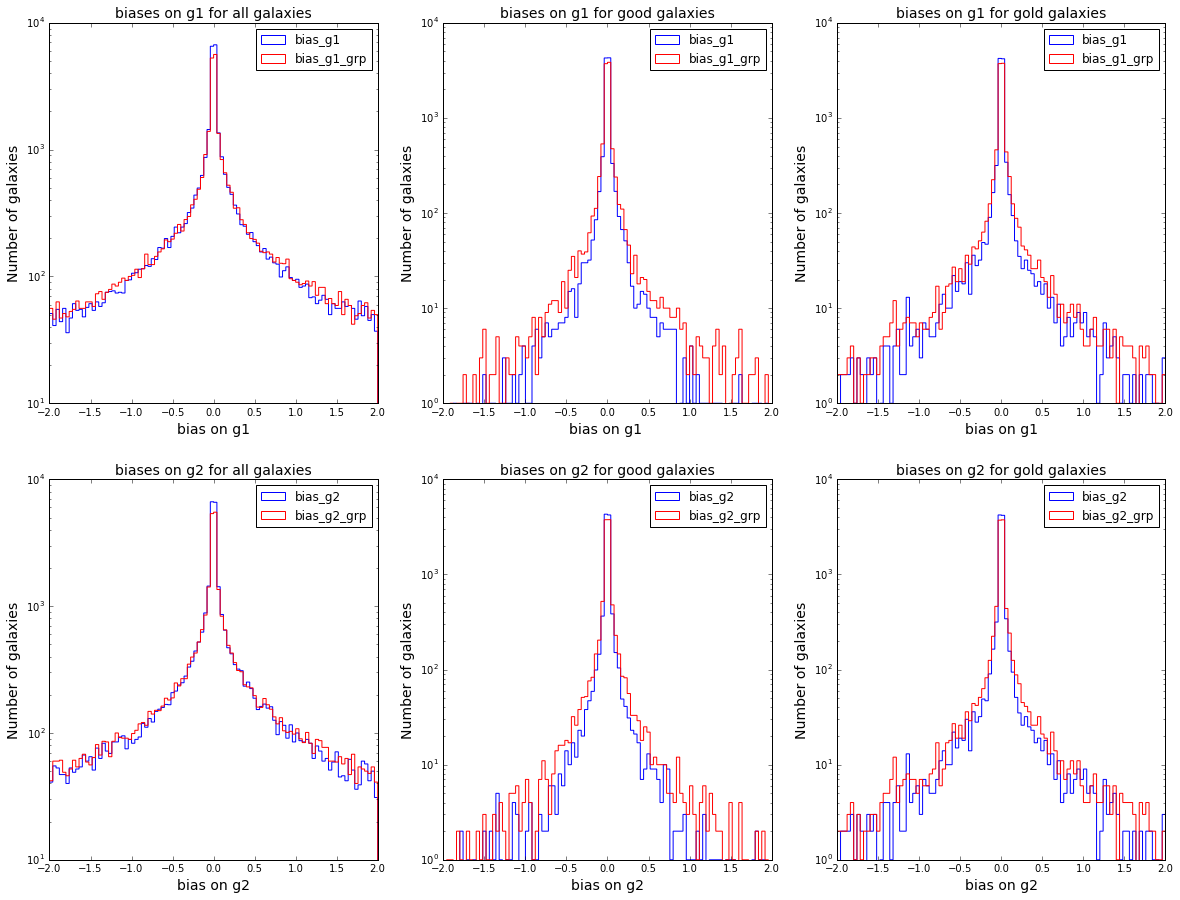

In [198]:
shear_biases_plots(cat)

### Scatter plots of biases

In [199]:
#scatter plot of bias_g vs bias_g_grp 
def scatter_shear_plots(cat, save=None):
    g_min = -2
    g_max = 2
    fig = plt.figure(figsize=(20,5))
    nrow,ncol = 1,3
    #
    plt.subplot(nrow, ncol, 1) 
    plt.scatter(cat['bias_g1'],cat['bias_g1_grp'],alpha=.3)
    plt.title('scatter of biases for all galaxies',fontsize=14)
    plt.xlabel('bias_g1',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g1_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 2) 
    plt.scatter(good['bias_g1'],good['bias_g1_grp'],alpha=.3)
    plt.title('scatter of biases for good galaxies',fontsize=14)
    plt.xlabel('bias_g1',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g1_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 3) 
    plt.scatter(gold['bias_g1'],gold['bias_g1_grp'],alpha=.3)
    plt.title('scatter of biases for gold galaxies',fontsize=14)
    plt.xlabel('bias_g1',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g1_grp',fontsize=14)

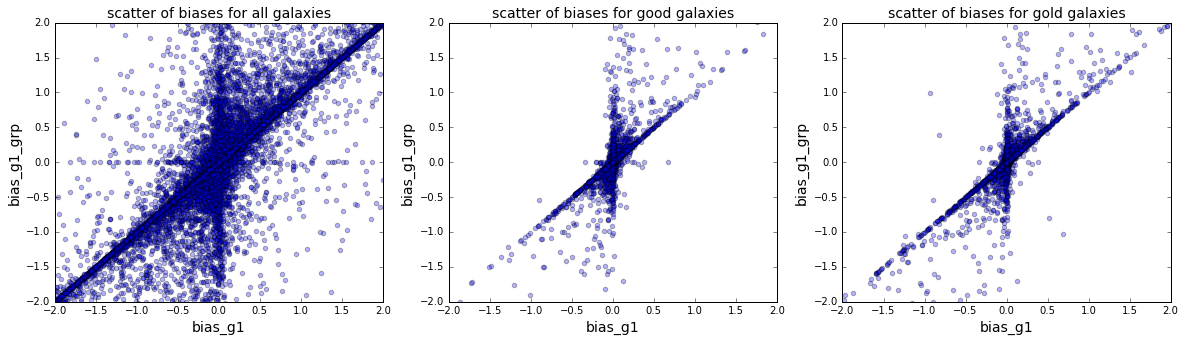

In [200]:
scatter_shear_plots(cat)

### Purity and Shear Plots 

In [201]:
#some plot from the notebook ShearEstimatorPlots using biases from the Fisher Formalism. 
def purity_shears(cat, save=None):
    g_min = -2
    g_max = 2
    fig = plt.figure(figsize=(20,15))
    nrow,ncol = 3,4
    #
    plt.subplot(nrow, ncol, 1) 
    plt.hist(cat['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(cat['bias_g2'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for all galaxies')
    plt.xlabel('bias on g1,2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,2)
    plt.plot(cat['bias_g1'],cat['bias_g2'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1')
    plt.ylabel('bias_g2')
    plt.grid()
    #
    plt.subplot(nrow,ncol,3)
    plt.plot(cat['purity'],cat['bias_g1'],'r+',label='bias_g1')
    plt.plot(cat['purity'],cat['bias_g2'],'bx',label='$bias_g2')
    plt.xlabel('Purity')
    plt.ylabel('bias_g1,2')
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,4)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (cat['purity'] >= xlo) & (cat['purity'] < xhi)
        dg1 = cat['bias_g1'][in_range]
        dg2 = cat['bias_g2'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.ylim(0.,1e8)
    plt.grid()
    plt.xlabel('Purity')
    plt.ylabel('Bias covariance')
    ##
    plt.tight_layout()

    #
    
    plt.subplot(nrow, ncol, 5) 
    plt.hist(good['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(good['bias_g2'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for good galaxies')
    plt.xlabel('bias_g1',fontsize=14)
    plt.ylabel('bias_g2',fontsize=14)
    #
    plt.subplot(nrow,ncol,6)
    plt.plot(good['bias_g1'],good['bias_g2'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1')
    plt.ylabel('bias_g2')
    plt.grid()
    #
    plt.subplot(nrow,ncol,7)
    plt.plot(good['purity'],good['bias_g1'],'r+',label='bias_g1')
    plt.plot(good['purity'],good['bias_g2'],'bx',label='$bias_g2')
    plt.xlabel('Purity')
    plt.ylabel('bias_g1,2')
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,8)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (good['purity'] >= xlo) & (good['purity'] < xhi)
        dg1 = good['bias_g1'][in_range]
        dg2 = good['bias_g2'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity')
    plt.ylabel('biases covariance')
    ##
    plt.tight_layout()

    #
    
    plt.subplot(nrow, ncol, 9) 
    plt.hist(gold['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(gold['bias_g2'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for gold galaxies')
    plt.xlabel('bias_g1',fontsize=14)
    plt.ylabel('bias_g2',fontsize=14)
    #
    plt.subplot(nrow,ncol,10)
    plt.plot(gold['bias_g1'],gold['bias_g2'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1')
    plt.ylabel('bias_g2')
    plt.grid()
    #
    plt.subplot(nrow,ncol,11)
    plt.plot(gold['purity'],gold['bias_g1'],'r+',label='bias_g1')
    plt.plot(gold['purity'],gold['bias_g2'],'bx',label='bias_g2')
    plt.xlabel('Purity')
    plt.ylabel('bias_g1,2')
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,12)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (gold['purity'] >= xlo) & (gold['purity'] < xhi)
        dg1 = gold['bias_g1'][in_range]
        dg2 = gold['bias_g2'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.ylim(-2.,50.)
    plt.grid()
    plt.xlabel('Purity')
    plt.ylabel('biases covariance')
    ##
    plt.tight_layout()

[  9.23559069e+05   3.50832501e+03   5.95970585e+04   2.33110025e+03
   2.89734446e+03   2.12878772e+03   2.20632303e+04   6.46738786e+02
   3.22608120e+06   1.20295512e+03   2.91651777e+03   7.25425490e+03]
[  2.06313477e+06   3.74302129e+03   1.00154631e+05   4.28039957e+03
   2.51741731e+03   1.05381470e+04   8.66985018e+03   8.77911392e+02
   3.27553512e+05   1.56813981e+03   3.58922143e+03   3.51282806e+03]
[-0.99922206 -0.06687502 -0.99949334 -0.24620344 -0.2608173  -0.12499958
  0.86268362  0.27710089  0.98620603 -0.43865181 -0.12973771  0.96294737]
[ 0.09987671  0.21166148  0.15398132  0.32319509  0.22219871  0.21636068
  0.19836679  0.26755215  0.1675264   0.17024012  0.14542072  0.12498949]
[ 0.27747433  0.3278369   0.16591926  0.19671285  0.17860909  0.32745442
  0.15634694  0.2335032   0.21321695  0.19146017  0.11251958  0.17749219]
[ 0.11126108  0.41656145 -0.23336396 -0.59720491 -0.29125867  0.14656094
  0.1453297   0.51322773  0.34544829 -0.30107546 -0.07150713 -0.103459

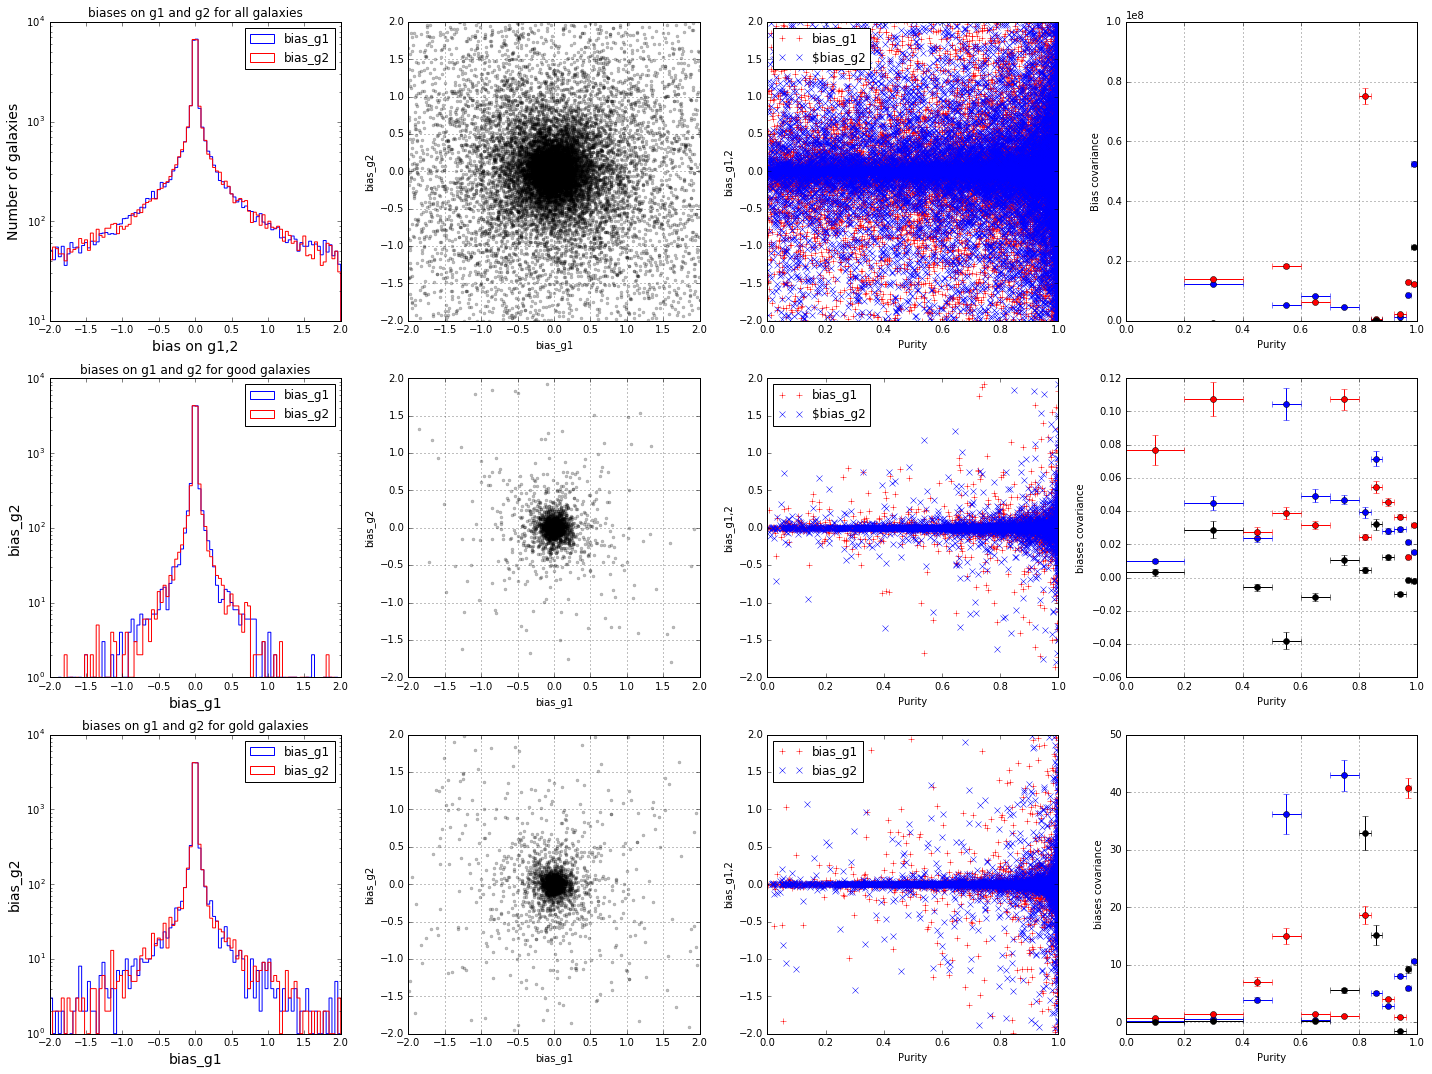

In [202]:
purity_shears(cat)

### Biases of flux measurement 

In [203]:
#similar plots but with bias on flux
def flux_biases_plots(cat,save=None):
    f_min = -3
    f_max = 3
    fig = plt.figure(figsize=(20,15))
    nrow,ncol = 1,3
    frac_bflux = cat['bias_f']/cat['flux']
    frac_bflux_grp = cat['bias_f_grp']/cat['flux']
    frac_bflux_g = good['bias_f']/good['flux']
    frac_bflux_grpg = good['bias_f_grp']/good['flux']
    frac_bflux_gold = gold['bias_f']/gold['flux']
    frac_bflux_grpgold = gold['bias_f_grp']/gold['flux']
    #
    plt.subplot(nrow, ncol, 1) 
    plt.hist(frac_bflux,range=[f_min,f_max],bins=100,histtype='step',label='bias_f/flux')
    plt.hist(frac_bflux_grp,range=[f_min,f_max],bins=100,color='red',histtype='step',label='bias_f_grp/flux')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on flux for all galaxies')
    plt.xlabel('bias on flux',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 2) 
    plt.hist(frac_bflux_g,range=[f_min,f_max],bins=100,histtype='step',label='bias_f/flux')
    plt.hist(frac_bflux_grpg,range=[f_min,f_max],bins=100,color='red',histtype='step',label='bias_f_grp/flux')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on flux for good galaxies')
    plt.xlabel('bias on flux',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 3) 
    plt.hist(frac_bflux_gold,range=[f_min,f_max],bins=100,histtype='step',label='bias_f/flux')
    plt.hist(frac_bflux_grpgold,range=[f_min,f_max],bins=100,color='red',histtype='step',label='bias_f_grp/flux')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on flux for gold galaxies')
    plt.xlabel('bias on flux',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)


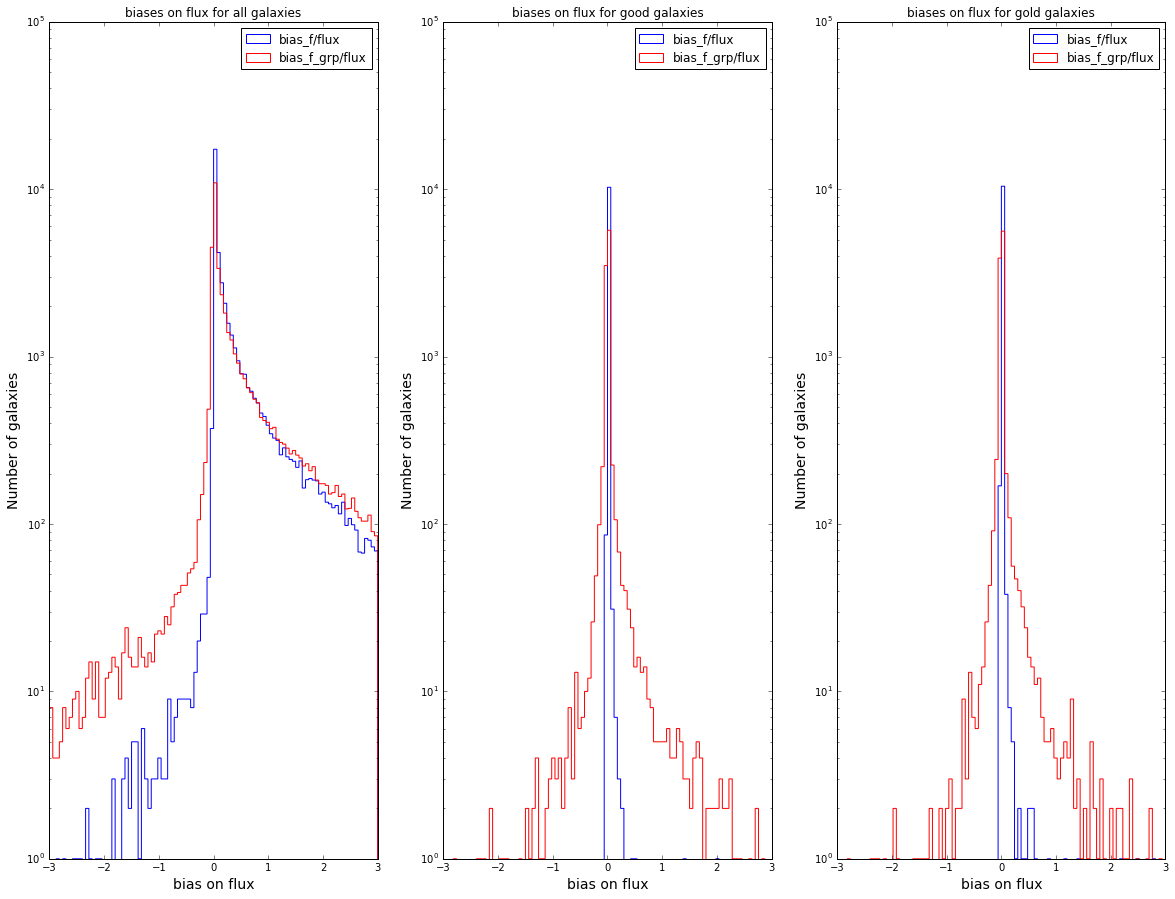

In [204]:
flux_biases_plots(cat)